____COVID 19 Tweet Analysis____

In [2]:
#Installing Packages
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#To Hide warnings
import warnings
warnings.filterwarnings('ignore')

import neattext.functions as nfx
from textblob import TextBlob
from collections import Counter
from wordcloud import WordCloud

In [3]:
#loading dataset
# Source of Dataset : https://github.com/gabrielpreda/covid-19-tweets/blob/master/covid19_tweets.csv
df=pd.read_csv('covid19_tweets.csv')
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [11]:
df.shape

(179108, 13)

In [12]:
#Checking Available Columns
df.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')

__Data Preprocessing__

In [13]:
#removing hashtags
df['clean_tweet_text']=df['text'].apply(nfx.remove_hashtags)

In [14]:
#printing hashtags removed text
df[['text','clean_tweet_text']]

,text,clean_tweet_text
0,If I smelled the scent of hand sanitizers toda...,If I smelled the scent of hand sanitizers toda...
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...,@diane3443 @wdunlap @realDonaldTrump Trump nev...
3,@brookbanktv The one gift #COVID19 has give me...,@brookbanktv The one gift has give me is an ...
4,25 July : Media Bulletin on Novel #CoronaVirus...,25 July : Media Bulletin on Novel \n@kansa...
...,...,...
179103,Thanks @IamOhmai for nominating me for the @WH...,Thanks @IamOhmai for nominating me for the @WH...
179104,2020! The year of insanity! Lol! #COVID19 http...,2020! The year of insanity! Lol! https://t.c...
179105,@CTVNews A powerful painting by Juan Lucena. I...,@CTVNews A powerful painting by Juan Lucena. I...
179106,"More than 1,200 students test positive for #CO...","More than 1,200 students test positive for a..."


In [15]:
#removing user handles(mention users in tweet)
df['clean_tweet_text'] = df['clean_tweet_text'].apply(lambda x: nfx.remove_userhandles(x))

In [16]:
#printing user handles removed text
df[['text','clean_tweet_text']]

,text,clean_tweet_text
0,If I smelled the scent of hand sanitizers toda...,If I smelled the scent of hand sanitizers toda...
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,Hey and - wouldn't it have made more sen...
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...,Trump never once claimed was a hoax. W...
3,@brookbanktv The one gift #COVID19 has give me...,The one gift has give me is an appreciatio...
4,25 July : Media Bulletin on Novel #CoronaVirus...,25 July : Media Bulletin on Novel \n ...
...,...,...
179103,Thanks @IamOhmai for nominating me for the @WH...,Thanks for nominating me for the challen...
179104,2020! The year of insanity! Lol! #COVID19 http...,2020! The year of insanity! Lol! https://t.c...
179105,@CTVNews A powerful painting by Juan Lucena. I...,A powerful painting by Juan Lucena. It's a t...
179106,"More than 1,200 students test positive for #CO...","More than 1,200 students test positive for a..."


In [17]:
#removing multiple white spaces
df['clean_tweet_text'] = df['clean_tweet_text'].apply(nfx.remove_multiple_spaces)

In [18]:
#printing multiple spaces removed text
df[['text','clean_tweet_text']]

,text,clean_tweet_text
0,If I smelled the scent of hand sanitizers toda...,If I smelled the scent of hand sanitizers toda...
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,Hey and - wouldn't it have made more sense to ...
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...,Trump never once claimed was a hoax. We all c...
3,@brookbanktv The one gift #COVID19 has give me...,The one gift has give me is an appreciation f...
4,25 July : Media Bulletin on Novel #CoronaVirus...,25 July : Media Bulletin on Novel https://t.co...
...,...,...
179103,Thanks @IamOhmai for nominating me for the @WH...,Thanks for nominating me for the challenge. I ...
179104,2020! The year of insanity! Lol! #COVID19 http...,2020! The year of insanity! Lol! https://t.co/...
179105,@CTVNews A powerful painting by Juan Lucena. I...,A powerful painting by Juan Lucena. It's a tr...
179106,"More than 1,200 students test positive for #CO...","More than 1,200 students test positive for at ..."


In [19]:
#removing urls from URLs
df['clean_tweet_text'] = df['clean_tweet_text'].apply(nfx.remove_urls)

In [20]:
#printing URLs removed text
df[['text','clean_tweet_text']]

,text,clean_tweet_text
0,If I smelled the scent of hand sanitizers toda...,If I smelled the scent of hand sanitizers toda...
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,Hey and - wouldn't it have made more sense to ...
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...,Trump never once claimed was a hoax. We all c...
3,@brookbanktv The one gift #COVID19 has give me...,The one gift has give me is an appreciation f...
4,25 July : Media Bulletin on Novel #CoronaVirus...,25 July : Media Bulletin on Novel
...,...,...
179103,Thanks @IamOhmai for nominating me for the @WH...,Thanks for nominating me for the challenge. I ...
179104,2020! The year of insanity! Lol! #COVID19 http...,2020! The year of insanity! Lol!
179105,@CTVNews A powerful painting by Juan Lucena. I...,A powerful painting by Juan Lucena. It's a tr...
179106,"More than 1,200 students test positive for #CO...","More than 1,200 students test positive for at ..."


In [21]:
#removing punctuations from text
df['clean_tweet_text'] = df['clean_tweet_text'].apply(nfx.remove_puncts)

In [22]:
#printing punctuations removed text
df[['text','clean_tweet_text']]

,text,clean_tweet_text
0,If I smelled the scent of hand sanitizers toda...,If I smelled the scent of hand sanitizers toda...
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,Hey and wouldnt it have made more sense to ha...
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...,Trump never once claimed was a hoax We all cl...
3,@brookbanktv The one gift #COVID19 has give me...,The one gift has give me is an appreciation f...
4,25 July : Media Bulletin on Novel #CoronaVirus...,25 July : Media Bulletin on Novel
...,...,...
179103,Thanks @IamOhmai for nominating me for the @WH...,Thanks for nominating me for the challenge I n...
179104,2020! The year of insanity! Lol! #COVID19 http...,2020 The year of insanity Lol
179105,@CTVNews A powerful painting by Juan Lucena. I...,A powerful painting by Juan Lucena Its a trib...
179106,"More than 1,200 students test positive for #CO...",More than 1200 students test positive for at m...


In [23]:
df['clean_tweet_text'] = df['clean_tweet_text'].str.lower()

In [24]:
df[['text','clean_tweet_text']]

,text,clean_tweet_text
0,If I smelled the scent of hand sanitizers toda...,if i smelled the scent of hand sanitizers toda...
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,hey and wouldnt it have made more sense to ha...
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...,trump never once claimed was a hoax we all cl...
3,@brookbanktv The one gift #COVID19 has give me...,the one gift has give me is an appreciation f...
4,25 July : Media Bulletin on Novel #CoronaVirus...,25 july : media bulletin on novel
...,...,...
179103,Thanks @IamOhmai for nominating me for the @WH...,thanks for nominating me for the challenge i n...
179104,2020! The year of insanity! Lol! #COVID19 http...,2020 the year of insanity lol
179105,@CTVNews A powerful painting by Juan Lucena. I...,a powerful painting by juan lucena its a trib...
179106,"More than 1,200 students test positive for #CO...",more than 1200 students test positive for at m...


__Sentiment Analysis__

In [25]:
#function to find the tweet's sentiment(positive or negative) 
def find_sentiment(text):
    blob=TextBlob(text)
    polarity=blob.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [26]:
#applying sentiment function to clean tweet text
df['sentiment']=df['clean_tweet_text'].apply(find_sentiment)

In [27]:
#checking sentiment results
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,clean_tweet_text,sentiment
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False,if i smelled the scent of hand sanitizers toda...,Negative
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False,hey and wouldnt it have made more sense to ha...,Positive
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False,trump never once claimed was a hoax we all cl...,Neutral
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False,the one gift has give me is an appreciation f...,Neutral
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,25 july : media bulletin on novel,Neutral


In [28]:
#printing counts of different sentiments(positive,negative,neutral)
df['sentiment'].value_counts()

Neutral     75489
Positive    74155
Negative    29464
Name: sentiment, dtype: int64

In [29]:
df[['clean_tweet_text','sentiment']]

,clean_tweet_text,sentiment
0,if i smelled the scent of hand sanitizers toda...,Negative
1,hey and wouldnt it have made more sense to ha...,Positive
2,trump never once claimed was a hoax we all cl...,Neutral
3,the one gift has give me is an appreciation f...,Neutral
4,25 july : media bulletin on novel,Neutral
...,...,...
179103,thanks for nominating me for the challenge i n...,Positive
179104,2020 the year of insanity lol,Positive
179105,a powerful painting by juan lucena its a trib...,Positive
179106,more than 1200 students test positive for at m...,Positive


<AxesSubplot:xlabel='sentiment', ylabel='count'>

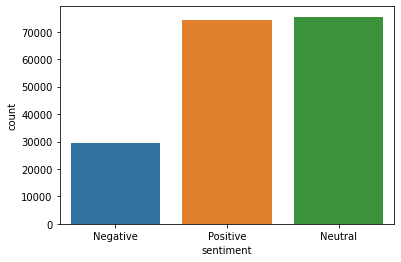

In [30]:
#plotting graph counts of sentiments
sns.countplot(df['sentiment'])

In [31]:
#Extracting Keywrods
#splitting dataset df by sentiments
positive_tweets=df[df['sentiment'] == 'Positive']['clean_tweet_text']
neutral_tweets=neutral_tweet = df[df['sentiment'] == 'Neutral']['clean_tweet_text']
negative_tweets = df[df['sentiment'] == 'Negative']['clean_tweet_text']

In [32]:
#removing stopwords and converting to tweet list
positive_tweets_list = positive_tweets.apply(nfx.remove_stopwords).tolist()
negative_tweets_list = negative_tweets.apply(nfx.remove_stopwords).tolist()
neutral_tweets_list = neutral_tweets.apply(nfx.remove_stopwords).tolist()

In [33]:
#checking positive tweets list after removing stopwords
positive_tweets_list[:5]

['hey wouldnt sense players pay respects a…',
 'change work general (and recruiting specifically) via/',
 'praying good health recovery',
 '👋🏻 — safe safe commit ensure…',
 'lets protect real numbers climbing fast continent lets n…']

In [34]:
#checking negative tweets list after removing stopwords
negative_tweets_list[:5]

['smelled scent hand sanitizers today past think intoxicated that…',
 'deaths continue rise bad politicians businesses want…',
 'image doesnt list source id careful overall risk dying statistics related to…',
 'im feeling little anxious detracted everyones…',
 'britain didnt understand months plenty countries understand took effective…']

In [35]:
#checking neutral tweets list after removing stopwords
neutral_tweets_list[:5]

['trump claimed hoax claim effort to…',
 'gift appreciation simple things me…',
 '25 july : media bulletin novel',
 'wear face coverings shopping includes visit local community pharmacy…',
 'pope god prophet sadhu sundar selvaraj watch']

In [36]:
#Tokenization: splitting words in every tweet and making list of words out of them.
positive_tweets_tokens=[token for line in positive_tweets_list  for token in line.split()]
negative_tweets_tokens=[token for line in negative_tweets_list  for token in line.split()]
neutral_tweets_tokens=[token for line in neutral_tweets_list  for token in line.split()]

In [37]:
#checking tokens of neutral tweets
print('neutral:',neutral_tweets_tokens[0:5])
print('positive:',positive_tweets_tokens[0:5])
print('negative:',negative_tweets_tokens[0:5])

neutral: ['trump', 'claimed', 'hoax', 'claim', 'effort']
positive: ['hey', 'wouldnt', 'sense', 'players', 'pay']
negative: ['smelled', 'scent', 'hand', 'sanitizers', 'today']


In [38]:
#function to find top n most common words in list
def get_common_tokens(lst,n=40):
    tokens=Counter(lst)
    n_most_common=tokens.most_common(n)
    return dict(n_most_common)

In [39]:
#getting 40 most commons words for 3 datasets(positive,negative,neutral) and creating dataframes to them
positive_df=pd.DataFrame(get_common_tokens(positive_tweets_tokens).items(),columns=['words','scores'])
negative_df=pd.DataFrame(get_common_tokens(negative_tweets_tokens).items(),columns=['words','scores'])
neutral_df=pd.DataFrame(get_common_tokens(neutral_tweets_tokens).items(),columns=['words','scores'])

In [40]:
#checking positive_df
positive_df.head()

,words,scores
0,new,13528
1,cases,11032
2,amp,5298
3,positive,4344
4,people,3984


In [41]:
#checking negative_df
negative_df.head()

,words,scores
0,cases,2520
1,people,2037
2,amp,2033
3,covid19,1111
4,pandemic,1103


In [42]:
#checking neutral_df
neutral_df.head()

,words,scores
0,amp,4544
1,covid19,4214
2,cases,3480
3,people,2985
4,pandemic,2893


__Bar Plots__

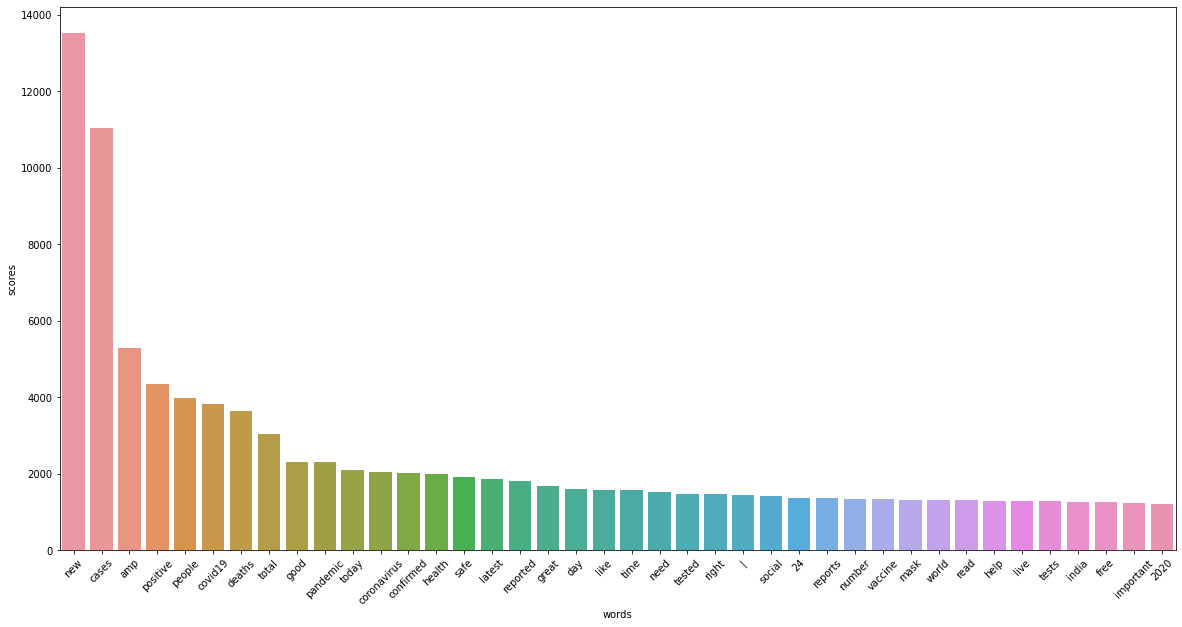

In [43]:
#plotting most common positive words with count
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=positive_df)
plt.xticks(rotation=45)
plt.show()

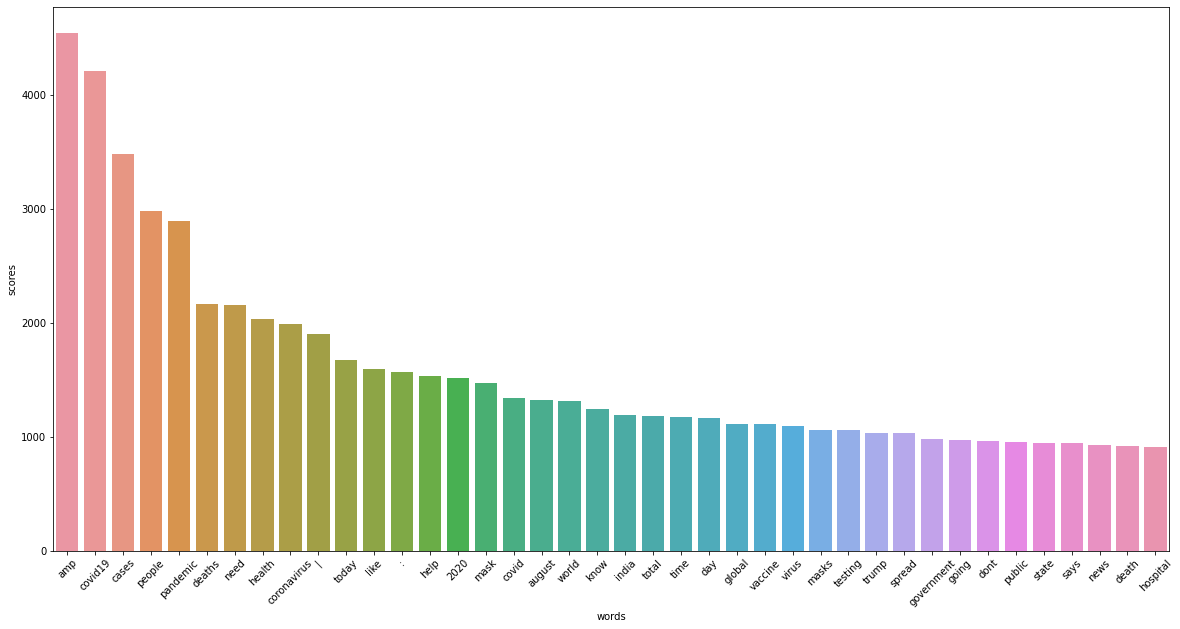

In [44]:
#plotting most common neutral words with count
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=neutral_df)
plt.xticks(rotation=45)
plt.show()

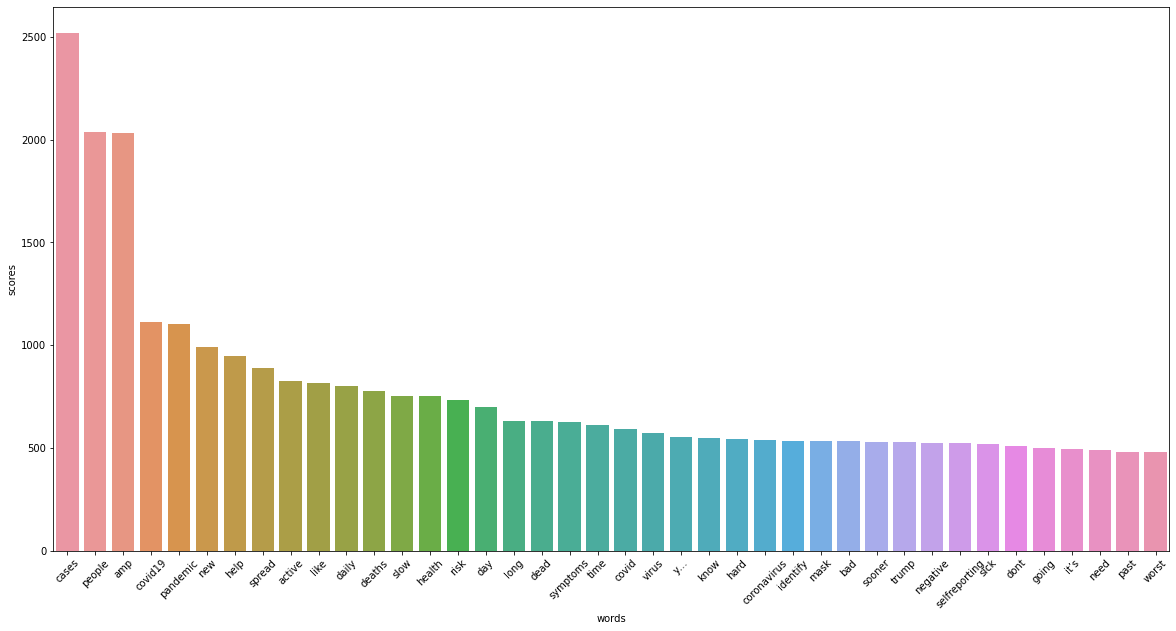

In [45]:
#plotting most common negative words with count
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=negative_df)
plt.xticks(rotation=45)
plt.show()

___WORD CLOUD___

In [46]:
#function to plot a word cloud 
def plot_wordcloud(words_string):
    plt.figure(figsize=(20,10))
    word_cloud = WordCloud().generate(words_string)
    plt.imshow(word_cloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

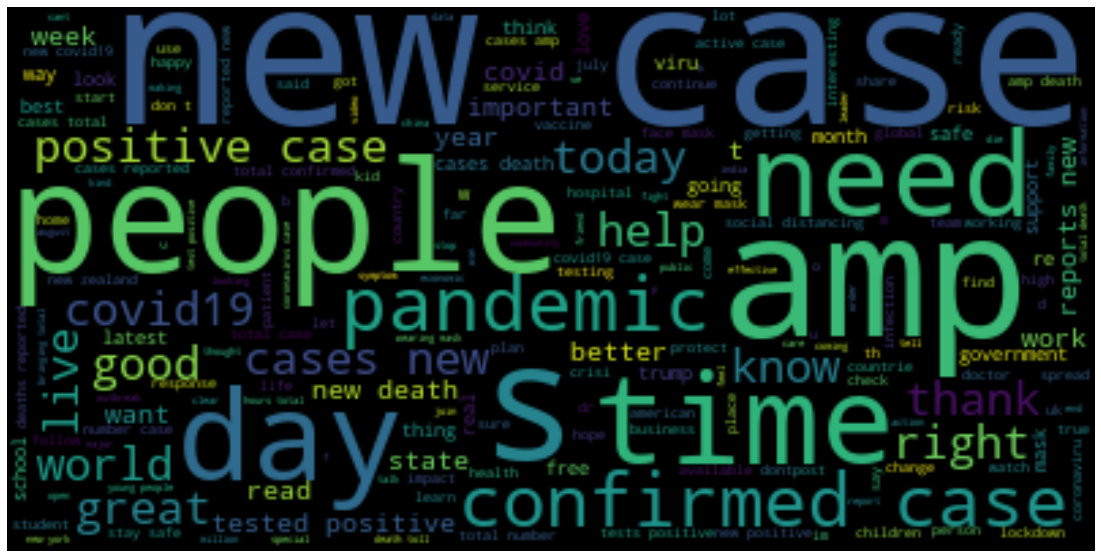

In [47]:
#plotting word_cloud of positive words
plot_wordcloud(' '.join(positive_tweets_tokens))

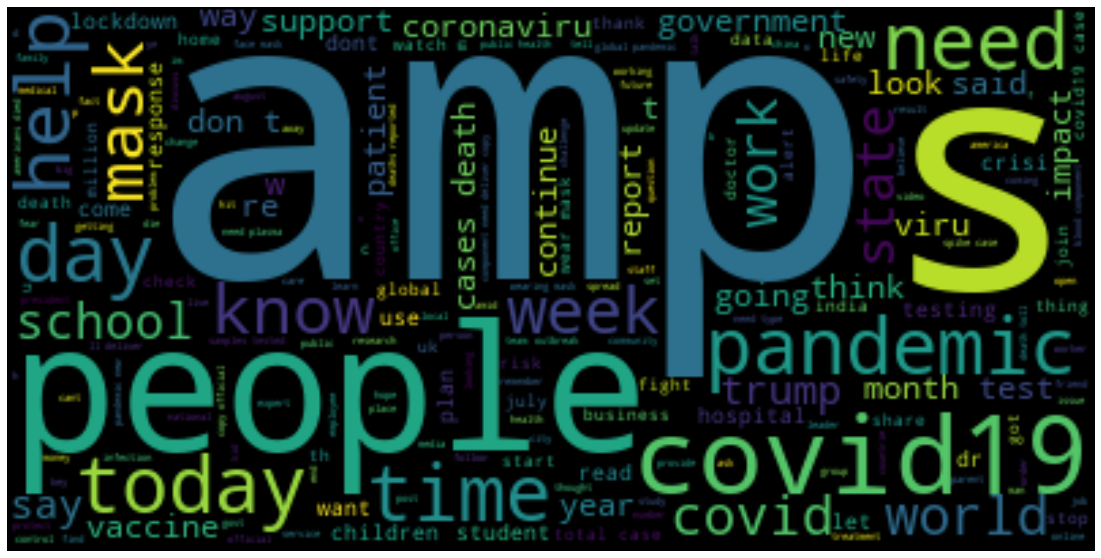

In [48]:
#plotting word cloud of neutral words
plot_wordcloud(' '.join(neutral_tweets_tokens))

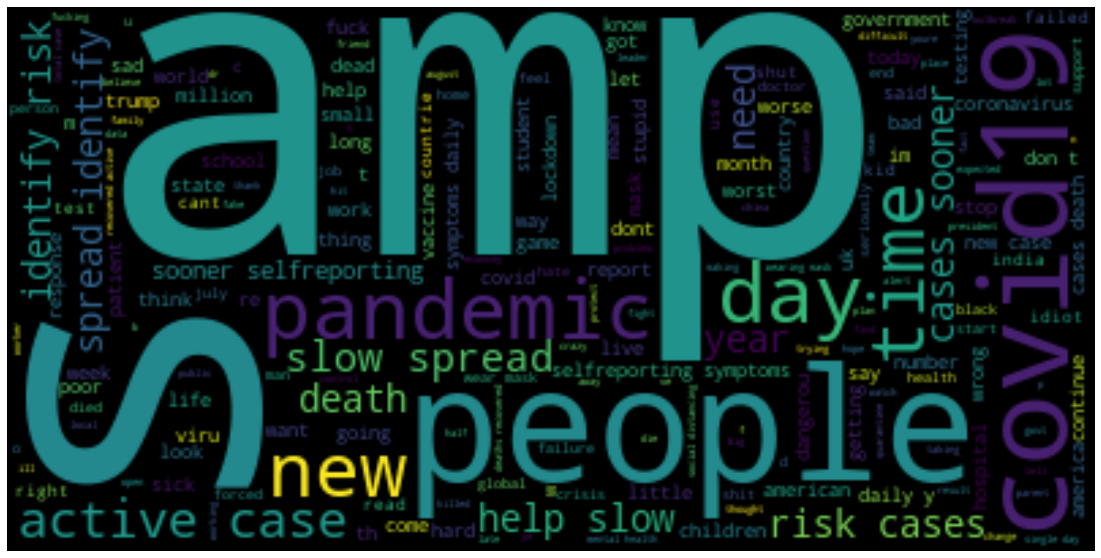

In [49]:
#plotting word cloud of negative words
plot_wordcloud(' '.join(negative_tweets_tokens))

___END OF ANALYSIS___

MODEL DEVELOPMENT

In [50]:
#importing packages
from keras.models import Sequential,Model
from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, GlobalMaxPooling1D, Conv1D, MaxPooling1D,Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [51]:
# Splitting the data into training and testing sets
train_data, test_data = train_test_split(df[df['sentiment']!='Neutral'], test_size=0.2)
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 82895
Test Data size 20724


In [54]:
#Finding Vocabulary size of train set
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.clean_tweet_text)
word_index = tokenizer.word_index

In [55]:
#defining Vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 67203


In [57]:
# The tokens are converted into sequences and then passed to the pad_sequences() function with length
x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.clean_tweet_text),maxlen =600)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.clean_tweet_text),maxlen = 600)

In [58]:
#FUnction to take topwords from tweets
def get_topwords(tweets_list,top_words):
    lst_top_words=[]
    for tweet in tweets_list:
        lst_filtered=[0 if x>top_words else x for x in tweet]
        lst_top_words.append(np.array(lst_filtered))
    return np.array(lst_top_words)

In [59]:
#Taking Top used words in datasets
top_words=3000
x_train= get_topwords(x_train,top_words)
x_test=get_topwords(x_test,top_words)
print(x_train.shape)

(82895, 600)


In [60]:
#Label Encoding to change Centiments to Int
sentiment_dict = {'Positive': 0, 'Negative': 1, 'Neutral': 2}
y_train_indices=np.array([sentiment_dict[sent] for sent in train_data.sentiment.to_list()])
y_test_indices=np.array([sentiment_dict[sent] for sent in test_data.sentiment.to_list()])


encoder = LabelEncoder()
encoder.fit(y_train_indices)
y_train = encoder.transform(y_train_indices)
y_test = encoder.transform(y_test_indices)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [55]:
#printing shapes of datasets
print('x_train shape:',x_train.shape,'\ny_train shape:',y_train.shape,'\nx_test shape:',x_test.shape,'\ny_test shape:',y_test.shape)

x_train shape: (82895, 600) 
y_train shape: (82895, 1) 
x_test shape: (20724, 600) 
y_test shape: (20724, 1)


In [61]:
#model creation using LSTM
embedding_vector_length=32
model=Sequential()
model.add(Embedding(vocab_size,embedding_vector_length,input_length=600))
model.add(LSTM(100,dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [62]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 600, 32)           2150496   
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 2,203,797
Trainable params: 2,203,797
Non-trainable params: 0
_________________________________________________________________


In [65]:
#training the model
#taking 3000 records of data due to time consumption
history=model.fit(x_train[:3000],y_train[:3000],epochs=10,batch_size=64)

Epoch 1/10
47/47 [==============================] - 69s 1s/step - loss: 0.6114 - accuracy: 0.7163
Epoch 2/10
47/47 [==============================] - 71s 2s/step - loss: 0.5316 - accuracy: 0.7283
Epoch 3/10
47/47 [==============================] - 72s 2s/step - loss: 0.3955 - accuracy: 0.8500
Epoch 4/10
47/47 [==============================] - 74s 2s/step - loss: 0.2323 - accuracy: 0.9187
Epoch 5/10
47/47 [==============================] - 79s 2s/step - loss: 0.1442 - accuracy: 0.9530
Epoch 6/10
47/47 [==============================] - 77s 2s/step - loss: 0.6248 - accuracy: 0.8157
Epoch 7/10
47/47 [==============================] - 80s 2s/step - loss: 0.3009 - accuracy: 0.8953
Epoch 8/10
47/47 [==============================] - 78s 2s/step - loss: 0.1881 - accuracy: 0.9397
Epoch 9/10
47/47 [==============================] - 77s 2s/step - loss: 0.1445 - accuracy: 0.9560
Epoch 10/10
47/47 [==============================] - 79s 2s/step - loss: 0.1020 - accuracy: 0.9713


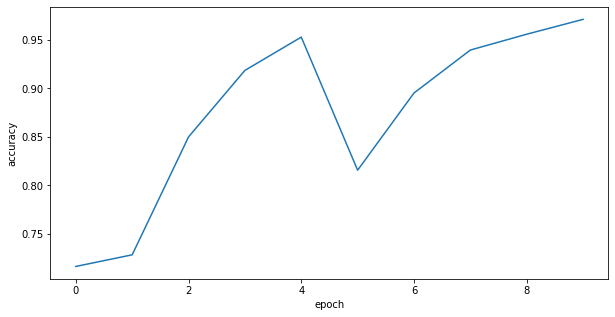

In [66]:
#Vsualization of LSTM model Accuracy 
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [67]:
#EValuating model with both train and test datasets
#Taking less data due to time consumption
train_accuracy=model.evaluate(x_train[1500:3500],y_train[1500:3500],verbose=0)
test_accuracy=model.evaluate(x_test[1500:3500],y_test[1500:3500],verbose=0)
print("Training accuracy:%.2f%%"%(train_accuracy[1]*100))
print("Testing accuracy:%.2f%%"%(test_accuracy[1]*100))

Training accuracy:94.65%
Testing accuracy:83.60%


In [68]:
#Model Creation of LSTM with CNN
model_cnn=Sequential()
model_cnn.add(Embedding(vocab_size,embedding_vector_length,input_length=600))
model_cnn.add(Conv1D(filters=32,kernel_size=3,padding='same',activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Dropout(0.2))
model_cnn.add(LSTM(100,dropout=0.2, recurrent_dropout=0.2))
model_cnn.add(Dense(1,activation='sigmoid'))
model_cnn.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [69]:
#summary of model
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 600, 32)           2150496   
                                                                 
 conv1d (Conv1D)             (None, 600, 32)           3104      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 300, 32)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 300, 32)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               53200     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                      

In [70]:
#training of Model
#taking less amount of data due to time consumption
history_cnn=model_cnn.fit(x_train[:3000],y_train[:3000],epochs=10,batch_size=64)

Epoch 1/10
47/47 [==============================] - 28s 563ms/step - loss: 0.6055 - accuracy: 0.7187
Epoch 2/10
47/47 [==============================] - 30s 634ms/step - loss: 0.5543 - accuracy: 0.7213
Epoch 3/10
47/47 [==============================] - 38s 805ms/step - loss: 0.3745 - accuracy: 0.8180
Epoch 4/10
47/47 [==============================] - 34s 714ms/step - loss: 0.2129 - accuracy: 0.9197
Epoch 5/10
47/47 [==============================] - 35s 743ms/step - loss: 0.1253 - accuracy: 0.9577
Epoch 6/10
47/47 [==============================] - 39s 828ms/step - loss: 0.0807 - accuracy: 0.9747
Epoch 7/10
47/47 [==============================] - 35s 753ms/step - loss: 0.0480 - accuracy: 0.9863
Epoch 8/10
47/47 [==============================] - 37s 790ms/step - loss: 0.0391 - accuracy: 0.9870
Epoch 9/10
47/47 [==============================] - 38s 809ms/step - loss: 0.0269 - accuracy: 0.9917
Epoch 10/10
47/47 [==============================] - 35s 734ms/step - loss: 0.0235 - accura

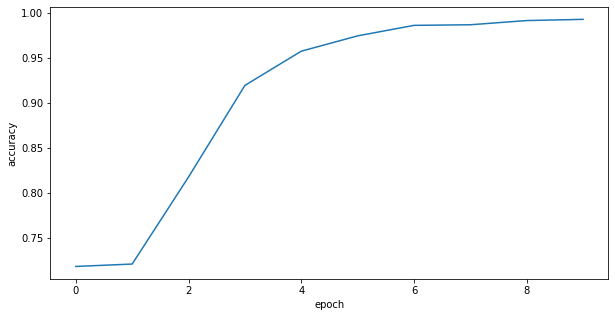

In [71]:
#Visualization of Model's Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history_cnn.history['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [72]:
#training and Testing Accuracies
train_accuracy_cnn=model_cnn.evaluate(x_train[1500:3500],y_train[1500:3500],verbose=0)
test_accuracy_cnn=model_cnn.evaluate(x_test[1500:3500],y_test[1500:3500],verbose=0)
print("Training accuracy:%.2f%%"%(train_accuracy_cnn[1]*100))
print("Testing accuracy:%.2f%%"%(test_accuracy_cnn[1]*100))

Training accuracy:95.80%
Testing accuracy:82.85%


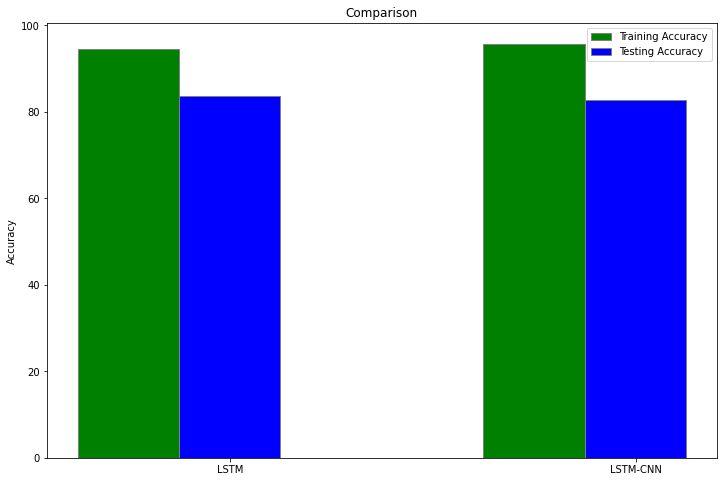

In [73]:
#Visualization for comparision of

training_accuracy=[train_accuracy[1]*100,train_accuracy_cnn[1]*100]
testing_accuracy=[test_accuracy[1]*100,test_accuracy_cnn[1]*100]

barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
plt.title('Comparison')
plt.ylabel('Accuracy')
br1 = np.arange(2)
plt.bar(br1,training_accuracy , color ='g', width = barWidth,
        edgecolor ='grey', label ='Training Accuracy')
plt.bar(br1+0.25, testing_accuracy, color ='b', width = barWidth,
        edgecolor ='grey', label ='Testing Accuracy')
plt.xticks([r + barWidth for r in range(2)],['LSTM','LSTM-CNN'])
plt.legend()
plt.show()

In [74]:
#function to predict the sentiment for a text
def predict_sentiment(text):
    text_seq = tokenizer.texts_to_sequences(text)
    text_pad = pad_sequences(text_seq, maxlen=600)
    predicted_sentiment=model.predict(text_pad).round()
    predicted_cnn=model.predict(text_pad).round()
    result_dict={}
    if predicted_sentiment == 1.0:
        result_dict["LSTM"]='Positive'
    else:
        result_dict["LSTM"]='Negative'
    if predicted_cnn == 1.0:
        result_dict["LSTM_CNN"]='Positive'
    else:
        result_dict["LSTM_CNN"]='Negative'
    return result_dict

In [77]:
#calling predict sentiment function with input
print(predict_sentiment([input('Enter text to find sentiment:')]))

Enter text to find sentiment: Due to COVID-19, so many people died world wide


{'LSTM': 'Negative', 'LSTM_CNN': 'Negative'}


In [84]:
#saving models for reusability.
#model.save('LSTM.h5')
#model_cnn.save('LSTM_CNN.h5')